**Analysis 1**

+ Plot 1: Comparison plot of number of men Vs number of women in each major

+ Plot 2: Gender ratio in each major

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

In [6]:
df=pd.read_csv("~/Final/Data/recent-grads.csv")
df.tail()

,Rank,Major_code,Major,Major_category,Total,Sample_size,Men,Women,ShareWomen,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
168,169,3609,ZOOLOGY,Biology & Life Science,8409,47,3050,5359,0.637293,6259,...,2190,3602,304,0.046320,26000,20000,39000,2771,2947,743
169,170,5201,EDUCATIONAL PSYCHOLOGY,Psychology & Social Work,2854,7,522,2332,0.817099,2125,...,572,1211,148,0.065112,25000,24000,34000,1488,615,82
170,171,5202,CLINICAL PSYCHOLOGY,Psychology & Social Work,2838,13,568,2270,0.799859,2101,...,648,1293,368,0.149048,25000,25000,40000,986,870,622
171,172,5203,COUNSELING PSYCHOLOGY,Psychology & Social Work,4626,21,931,3695,0.798746,3777,...,965,2738,214,0.053621,23400,19200,26000,2403,1245,308
172,173,3501,LIBRARY SCIENCE,Education,1098,2,134,964,0.877960,742,...,237,410,87,0.104946,22000,20000,22000,288,338,192


In [7]:
major=list(df.groupby(by=['Major_category'])['Major_category'].unique())

In [8]:
#tatal men and women in each major
total_men_major_category=list(df.groupby(by=['Major_category'])['Men'].sum())
total_Women_major_category=list(df.groupby(by=['Major_category'])['Women'].sum())

In [9]:
#total number of candidates in each major
total_major_category=[0]*16
for i in range(0,len(total_men_major_category)):
    total_major_category[i]=total_men_major_category[i]+total_Women_major_category[i]

In [10]:
#calculate percentage
percentage_men_major_category=[0]*16
percentage_women_major_category=[0]*16
for i in range(0,len(total_men_major_category)):
    percentage_men_major_category[i]=(total_men_major_category[i]/total_major_category[i])*100
    percentage_women_major_category[i]=(total_Women_major_category[i]/total_major_category[i])*100 

In [11]:
#plot of number of women compared to number on men in each major
df1=pd.DataFrame({'Number of Men':total_men_major_category,'Major_category':major,'Number of Women':total_Women_major_category,'Percentage of Women':percentage_women_major_category,'Percentage of Men':percentage_men_major_category})
df1=df1.set_index('Major_category')
df1

,Number of Men,Number of Women,Percentage of Men,Percentage of Women
Major_category,,,,
[Agriculture & Natural Resources],197875,249812,44.199407,55.800593
[Arts],86781,140469,38.187459,61.812541
[Biology & Life Science],427803,578132,42.527897,57.472103
[Business],176917,110367,61.582615,38.417385
[Communications & Journalism],36692,98278,27.185300,72.814700
[Computers & Mathematics],59623,62599,48.782543,51.217457
[Education],257712,612958,29.599274,70.400726
[Engineering],400644,118051,77.240768,22.759232
[Health],94630,312026,23.270282,76.729718


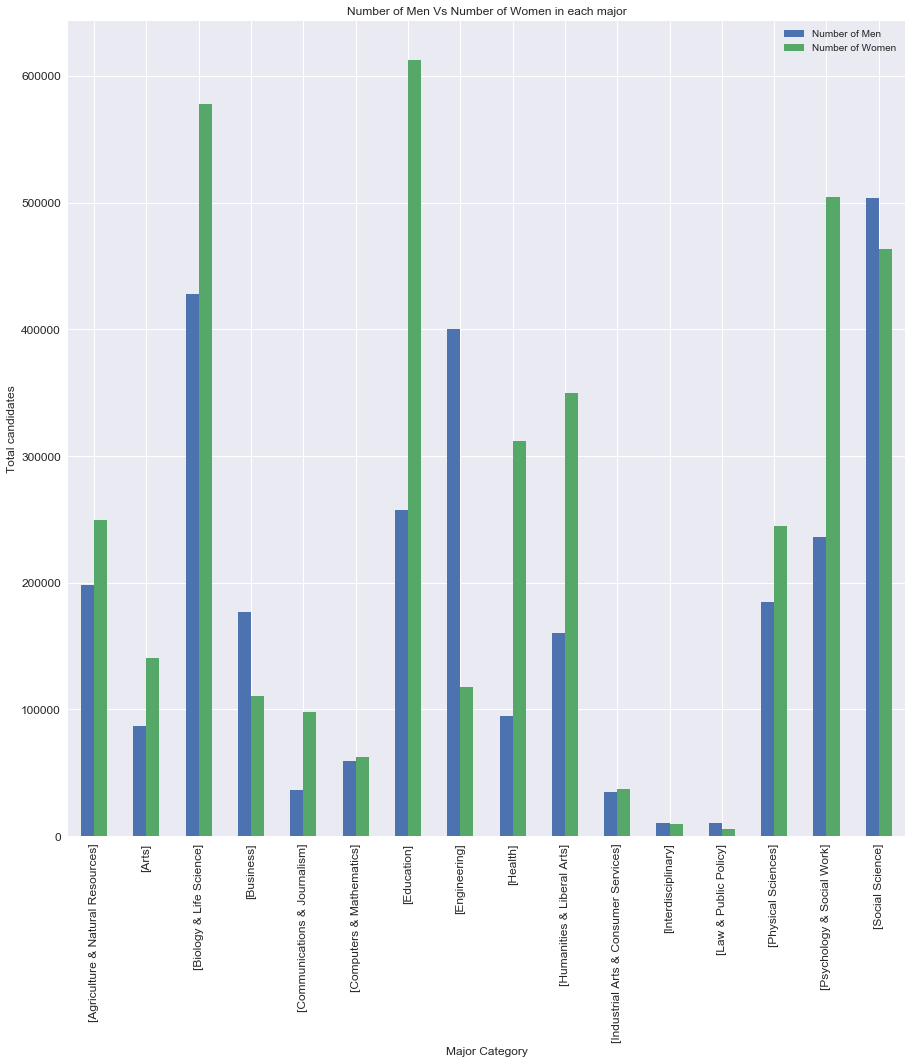

In [12]:
plt.close('all')
ax = df1[['Number of Men','Number of Women']].plot(kind='bar', title ="Number of Men Vs Number of Women in each major",figsize=(15, 15), legend=True, fontsize=12)
ax.set_xlabel("Major Category", fontsize=12)
ax.set_ylabel("Total candidates", fontsize=12)
fig = ax.get_figure()
fig.savefig("TotalMenVsTotalWomen")
plt.show()

In [13]:
#gender ratio in each major field
gender_ratio=[0]*16
for i in range(0,len(total_men_major_category)):
    gender_ratio[i]=(total_men_major_category[i]/total_Women_major_category[i])*100

In [14]:
#plot of the gender ratio in each major
df2=pd.DataFrame({'Number of Men':total_men_major_category,'Major_category':major,'Number of Women':total_Women_major_category,'Gender ratio':gender_ratio})
df2=df2.set_index('Major_category')
df2

,Gender ratio,Number of Men,Number of Women
Major_category,,,
[Agriculture & Natural Resources],79.209566,197875,249812
[Arts],61.779467,86781,140469
[Biology & Life Science],73.997461,427803,578132
[Business],160.298821,176917,110367
[Communications & Journalism],37.334907,36692,98278
[Computers & Mathematics],95.245930,59623,62599
[Education],42.043990,257712,612958
[Engineering],339.382131,400644,118051
[Health],30.327601,94630,312026


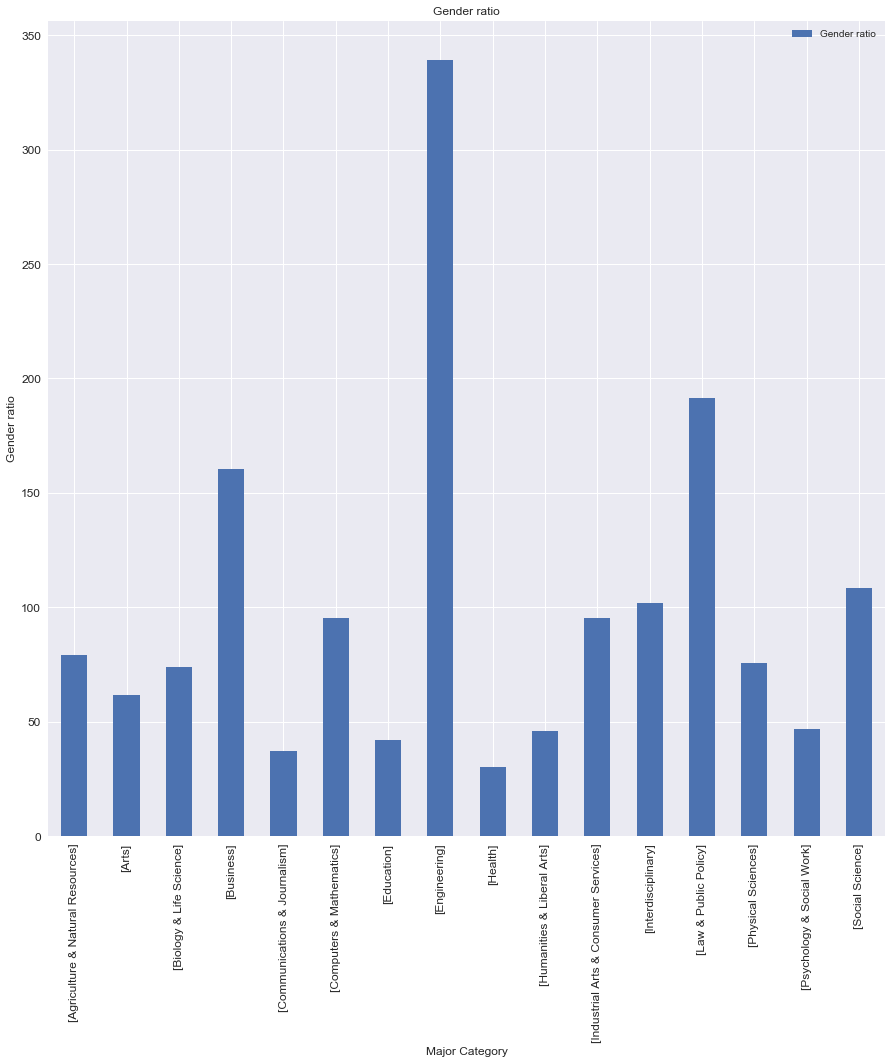

In [15]:
plt.close('all')
ax = df2[['Gender ratio']].plot(kind='bar', title ="Gender ratio",figsize=(15, 15), legend=True, fontsize=12)
ax.set_xlabel("Major Category", fontsize=12)
ax.set_ylabel("Gender ratio", fontsize=12)
fig = ax.get_figure()
fig.savefig("GenderRatio")
plt.show()